In [15]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [16]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Defining paths of the train, validation, and test image sources
Train_Val_Path = '/content/drive/MyDrive/surya/ML_Assignment/charts/train_val'
Test_Path = '/content/drive/MyDrive/surya/ML_Assignment/charts/test'

# Load the train_val.csv file as a pandas DataFrame
df_train_val = pd.read_csv('/content/drive/MyDrive/surya/ML_Assignment/charts/train_val.csv')

# convert the values in the 'image_index' column to strings
df_train_val['image_index'] = df_train_val['image_index'].astype(str).apply(lambda x: x + '.png')
print(df_train_val)
# Create data generator for training and validation images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    image_index              type
0         0.png  vbar_categorical
1         1.png  vbar_categorical
2         2.png  vbar_categorical
3         3.png  vbar_categorical
4         4.png  vbar_categorical
..          ...               ...
995     995.png          dot_line
996     996.png          dot_line
997     997.png          dot_line
998     998.png          dot_line
999     999.png          dot_line

[1000 rows x 2 columns]


In [26]:
# Creating the Batches of Data for Train, Valid, and Test (that will pass through seq. model for prediction)
# ImageDataGenerator function label the data according shown classes [Dot, Hor Bar, etc.]
train_val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training and validation images
train_batches = train_val_datagen.flow_from_dataframe(
    dataframe=df_train_val,
    directory='/content/drive/MyDrive/surya/ML_Assignment/charts/train_val',
    x_col='image_index',
    y_col='type',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')
#print(train_generator)

val_batches = train_val_datagen.flow_from_dataframe(
    dataframe=df_train_val,
    directory='/content/drive/MyDrive/surya/ML_Assignment/charts/train_val',
    x_col='image_index',
    y_col='type',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_dataframe(
    dataframe=df_train_val,
    directory=Test_Path,
    x_col='image_index',
    y_col='type',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',shuffle=False)
    #subset='validation')

Found 800 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.
Found 50 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 950 invalid image filename(s) in x_col="image_index". These filename(s) will be ignored.
  warnings.warn(


In [27]:
# Define the CNN-based classification model
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=5, activation='softmax')
])

# Checkout Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [31]:
# Compile model with low learning rate as proven optimal and cat.-crossentropy as we have multiple prediction option
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model through Train and Validation data
history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=val_batches,
                    validation_steps=len(val_batches), epochs=100, verbose=2)

Epoch 1/100
25/25 - 19s - loss: 0.3468 - accuracy: 0.8487 - val_loss: 15.1159 - val_accuracy: 0.0000e+00 - 19s/epoch - 774ms/step
Epoch 2/100
25/25 - 17s - loss: 0.3032 - accuracy: 0.8712 - val_loss: 16.2417 - val_accuracy: 0.0000e+00 - 17s/epoch - 690ms/step
Epoch 3/100
25/25 - 15s - loss: 0.2928 - accuracy: 0.8675 - val_loss: 16.5762 - val_accuracy: 0.0000e+00 - 15s/epoch - 593ms/step
Epoch 4/100
25/25 - 14s - loss: 0.2864 - accuracy: 0.8675 - val_loss: 16.5246 - val_accuracy: 0.0000e+00 - 14s/epoch - 577ms/step
Epoch 5/100
25/25 - 17s - loss: 0.2530 - accuracy: 0.9175 - val_loss: 16.5889 - val_accuracy: 0.0000e+00 - 17s/epoch - 674ms/step
Epoch 6/100
25/25 - 15s - loss: 0.2526 - accuracy: 0.8988 - val_loss: 16.6414 - val_accuracy: 0.0000e+00 - 15s/epoch - 593ms/step
Epoch 7/100
25/25 - 15s - loss: 0.2463 - accuracy: 0.8825 - val_loss: 16.5189 - val_accuracy: 0.0000e+00 - 15s/epoch - 595ms/step
Epoch 8/100
25/25 - 15s - loss: 0.2265 - accuracy: 0.9187 - val_loss: 16.2973 - val_accura

2/2 - 3s - loss: 27.2044 - accuracy: 0.1200 - 3s/epoch - 2s/step
Test Loss: 27.204387664794922
Test Accuracy: 0.11999999731779099
2/2 - 0s - 425ms/epoch - 213ms/step


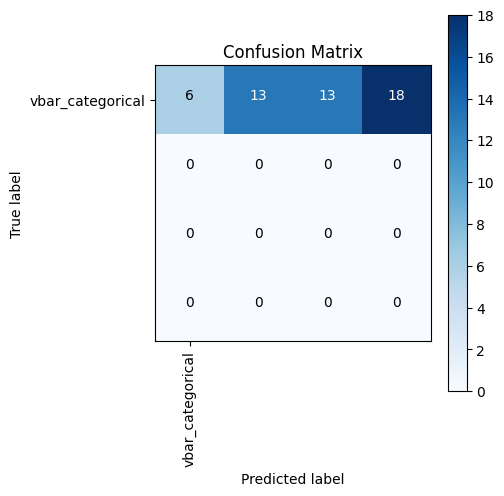

In [30]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x=test_batches, steps=len(test_batches), verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
test_pred = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

# Convert predictions to class labels
test_pred_classes = np.argmax(test_pred, axis=1)

# Convert true labels to class labels
test_true_classes = test_batches.classes

# Calculate confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_batches.class_indices))
plt.xticks(tick_marks, test_batches.class_indices, rotation=90)
plt.yticks(tick_marks, test_batches.class_indices)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()